## Steps of Time Series Analysis

1. Basic Data Check
   
    (DataFrame, No Nulls)

2. Visualize and Decompose

3. Seasonlity
    - Find the "Shiftdiff"
    - to make it stationary (Rolling mean+std, ADF Test)

4. ARIMA
    - PACF
    - ACF

5. SARIMAX

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Sets/monthly-cola-production-in-austr.csv')

In [26]:
#@title{vertical-output:true}
df.head(10)

,Month,Monthly cola production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9
5,1956-06,64.8
6,1956-07,70.1
7,1956-08,77.3
8,1956-09,79.5
9,1956-10,100.6


In [27]:
#@title{vertical-output:true}
df.tail(10)

,Month,Monthly cola production
466,1994-11,190.0
467,1994-12,182.0
468,1995-01,138.0
469,1995-02,136.0
470,1995-03,152.0
471,1995-04,127.0
472,1995-05,151.0
473,1995-06,130.0
474,1995-07,119.0
475,1995-08,153.0


In [28]:
#@title{vertical-output:true}
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    476 non-null    object 
 1   Monthly cola production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [29]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

In [30]:
df.set_index('Month', inplace=True)

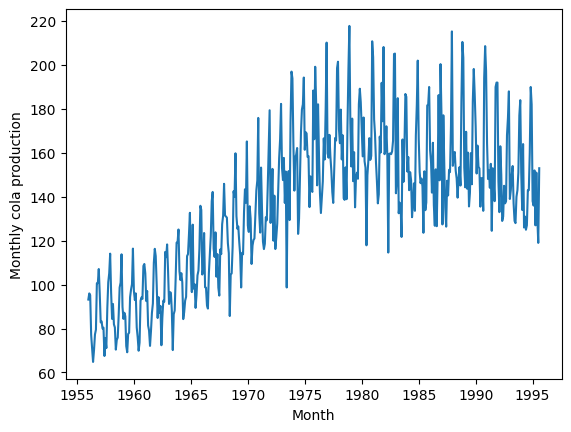

In [31]:
#@title{vertical-output:true}
plt.figure()
sns.lineplot(data=df, x=df.index, y=df['Monthly cola production'])
plt.show()

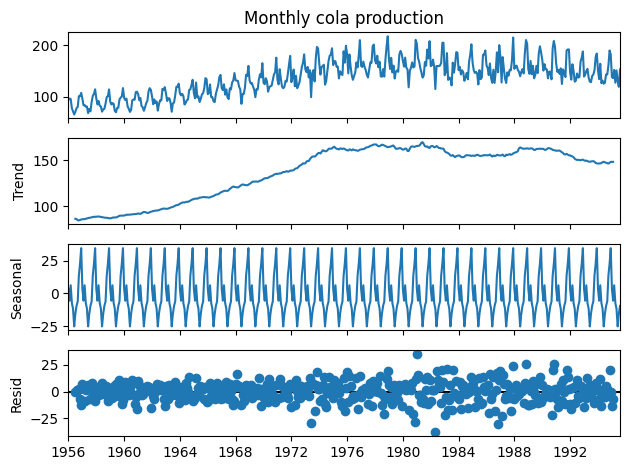

In [32]:
#@title{vertical-output:true}
#check further for seasonality and trend
from statsmodels.tsa.seasonal import seasonal_decompose
decmoposition = seasonal_decompose(df['Monthly cola production'], period=12)
fig = decmoposition.plot()
plt.show()

In [33]:
#@title{vertical-output:true}
def test_stationarity(dataFrame, var):
    dataFrame['rollMean'] = dataFrame[var].rolling(window = 12).mean()
    dataFrame['rollStd'] = dataFrame[var].rolling(window = 12).mean()
    print(dataFrame.iloc[12:])
    from statsmodels.tsa.stattools import adfuller

    adfTest = adfuller(dataFrame[var])
    print(adfTest)

    stats = pd.Series(adfTest[0:4], index=['Test Statistic', 'p-vale', '#lags used', 'number of observations used'])
    print(stats)

    for key, values in adfTest[4].items():
        print("criticality", key, ":", values)

    plt.figure(figsize=(8,6))
    sns.lineplot(data = dataFrame, x = dataFrame.index, color='blue', y = var)
    sns.lineplot(data = dataFrame, x = dataFrame.index, color='red', y = 'rollMean')
    sns.lineplot(data = dataFrame, x = dataFrame.index, color='green', y = 'rollStd')
    plt.show()
    return dataFrame

            Monthly cola production  shift  shiftDiff
Month                                                
1956-01-01                     93.2    NaN        NaN
1956-02-01                     96.0   93.2        2.8
1956-03-01                     95.2   96.0       -0.8
1956-04-01                     77.1   95.2      -18.1
1956-05-01                     70.9   77.1       -6.2
1956-06-01                     64.8   70.9       -6.1
1956-07-01                     70.1   64.8        5.3
1956-08-01                     77.3   70.1        7.2
1956-09-01                     79.5   77.3        2.2
1956-10-01                    100.6   79.5       21.1
1956-11-01                    100.7  100.6        0.1
1956-12-01                    107.1  100.7        6.4
1957-01-01                     95.9  107.1      -11.2
1957-02-01                     82.8   95.9      -13.1
1957-03-01                     83.3   82.8        0.5
1957-04-01                     80.0   83.3       -3.3
1957-05-01                  

<ipython-input-33-255b41ee4972>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window = 12).mean()
<ipython-input-33-255b41ee4972>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[var].rolling(window = 12).mean()


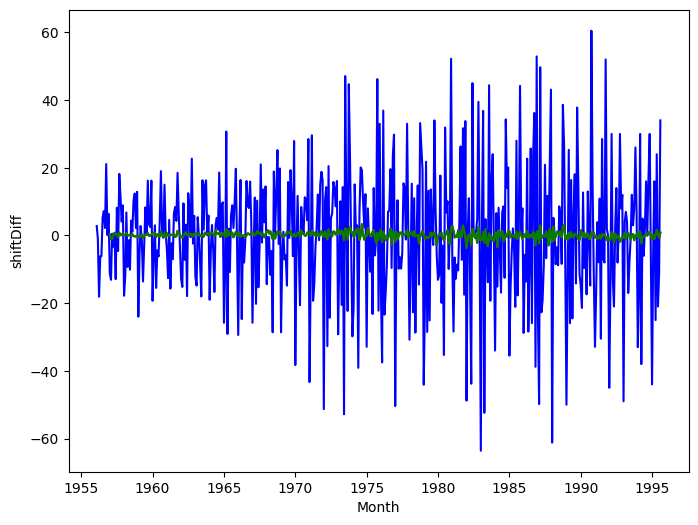

            Monthly cola production  shift  shiftDiff
Month                                                
1956-01-01                     93.2    NaN        NaN
1956-02-01                     96.0    NaN        NaN
1956-03-01                     95.2   93.2        2.0
1956-04-01                     77.1   96.0      -18.9
1956-05-01                     70.9   95.2      -24.3
1956-06-01                     64.8   77.1      -12.3
1956-07-01                     70.1   70.9       -0.8
1956-08-01                     77.3   64.8       12.5
1956-09-01                     79.5   70.1        9.4
1956-10-01                    100.6   77.3       23.3
1956-11-01                    100.7   79.5       21.2
1956-12-01                    107.1  100.6        6.5
1957-01-01                     95.9  100.7       -4.8
1957-02-01                     82.8  107.1      -24.3
1957-03-01                     83.3   95.9      -12.6
1957-04-01                     80.0   82.8       -2.8
1957-05-01                  

In [34]:
#@title{vertical-output: true}

df_test = df[['Monthly cola production']].copy()

df_test['shift'] = df_test['Monthly cola production'].shift(1)
df_test['shiftDiff'] = df_test['Monthly cola production'] - df_test['shift']
print(df_test.head(20))
test_stationarity(df_test.dropna(), 'shiftDiff')

df_test['shift'] = df_test['Monthly cola production'].shift(2)
df_test['shiftDiff'] = df_test['Monthly cola production'] - df_test['shift']

print(df_test.head(20))

            Monthly cola production  shift  shiftDiff  rollMean   rollStd
Month                                                                    
1957-03-01                     83.3   95.9      -12.6 -2.091667 -2.091667
1957-04-01                     80.0   82.8       -2.8 -0.750000 -0.750000
1957-05-01                     80.4   83.3       -2.9  1.033333  1.033333
1957-06-01                     67.5   80.0      -12.5  1.016667  1.016667
1957-07-01                     75.7   80.4       -4.7  0.691667  0.691667
...                             ...    ...        ...       ...       ...
1995-04-01                    127.0  136.0       -9.0 -0.916667 -0.916667
1995-05-01                    151.0  152.0       -1.0  1.750000  1.750000
1995-06-01                    130.0  127.0        3.0  2.083333  2.083333
1995-07-01                    119.0  151.0      -32.0 -0.250000 -0.250000
1995-08-01                    153.0  130.0       23.0  0.166667  0.166667

[462 rows x 5 columns]
(-4.0512224979

<ipython-input-33-255b41ee4972>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window = 12).mean()
<ipython-input-33-255b41ee4972>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[var].rolling(window = 12).mean()


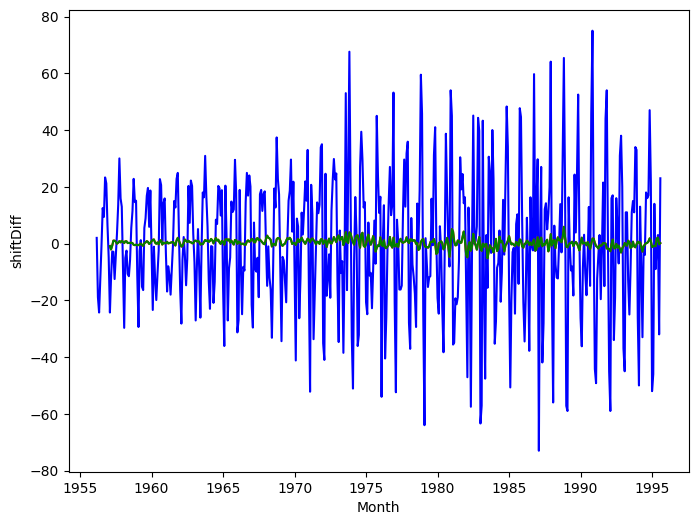

,Monthly cola production,shift,shiftDiff,rollMean,rollStd
Month,,,,,
1956-03-01,95.2,93.2,2.0,NaN,NaN
1956-04-01,77.1,96.0,-18.9,NaN,NaN
1956-05-01,70.9,95.2,-24.3,NaN,NaN
1956-06-01,64.8,77.1,-12.3,NaN,NaN
1956-07-01,70.1,70.9,-0.8,NaN,NaN
...,...,...,...,...,...
1995-04-01,127.0,136.0,-9.0,-0.916667,-0.916667
1995-05-01,151.0,152.0,-1.0,1.750000,1.750000
1995-06-01,130.0,127.0,3.0,2.083333,2.083333


In [35]:
#@title{vertical-output:true}
test_stationarity(df_test.dropna(), 'shiftDiff')

            Monthly cola production  firstDiff  Diff12
Month                                                 
1956-01-01                     93.2        NaN     NaN
1956-02-01                     96.0        2.8     NaN
1956-03-01                     95.2       -0.8     NaN
1956-04-01                     77.1      -18.1     NaN
1956-05-01                     70.9       -6.2     NaN


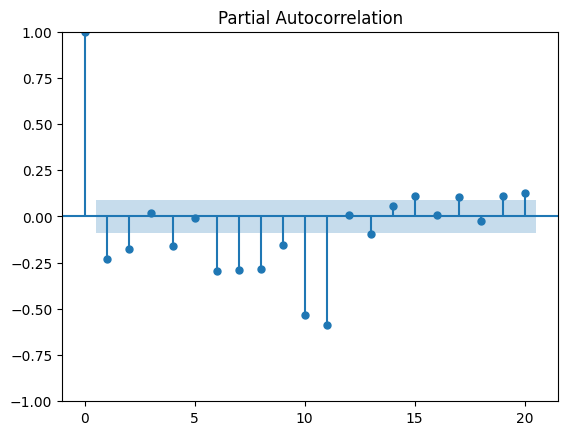

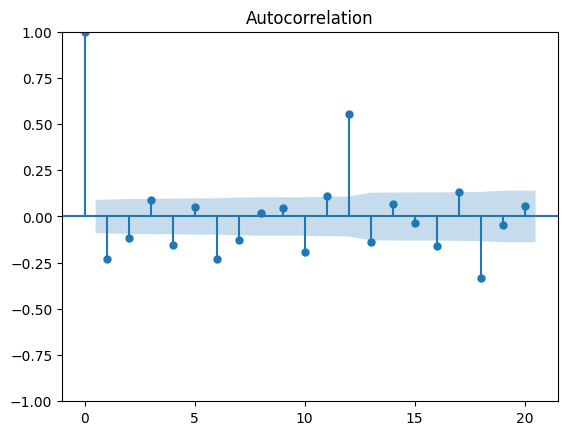

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


            Monthly cola production  firstDiff  Diff12   arimaPred
Month                                                             
1995-04-01                    127.0      -25.0     1.0  174.212373
1995-05-01                    151.0       24.0    20.0  174.383144
1995-06-01                    130.0      -21.0     5.0  174.553914
1995-07-01                    119.0      -11.0    -8.0  174.724685
1995-08-01                    153.0       34.0    10.0  174.895456


In [36]:
#@title{vertical-output:true}
# Now ARIMA: In google colab, you may need Ipip install pmdarima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

airp = df[['Monthly cola production']].copy(deep=True)
airp['firstDiff'] = airp['Monthly cola production'].diff()
airp['Diff12'] = airp['Monthly cola production'].diff(12) #This will be used later in SARIMAX

print(airp.head())
plot_pacf(airp['firstDiff'].dropna(),lags=20)
plt.show()

plot_acf(airp['firstDiff'].dropna(),lags=20)
plt.show()

#Build ARIMA model

train = airp[:round (len(airp) *70/100)] # Take the first 70% data print(train.tail()) # Just to check where it ends
test = airp[round (len(airp) *70/100):] # Take the last 30% data, starting from 71% print(test.head()) # Just to check where it starts
model = ARIMA(train ['Monthly cola production'], order=(1,2,1)) # Parameters: p, d, q

model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0], end=test.index[-1])
airp['arimaPred'] = prediction
print(airp.tail())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


            Monthly cola production  sarimaxPred
Month                                           
1995-04-01                    127.0   155.686537
1995-05-01                    151.0   150.446281
1995-06-01                    130.0   141.082517
1995-07-01                    119.0   146.442692
1995-08-01                    153.0   161.175527
            Monthly cola production  firstDiff  Diff12  arimaPred
Month                                                            
1956-01-01                     93.2        NaN     NaN        NaN
1956-02-01                     96.0        2.8     NaN        NaN
1956-03-01                     95.2       -0.8     NaN        NaN
1956-04-01                     77.1      -18.1     NaN        NaN
1956-05-01                     70.9       -6.2     NaN        NaN


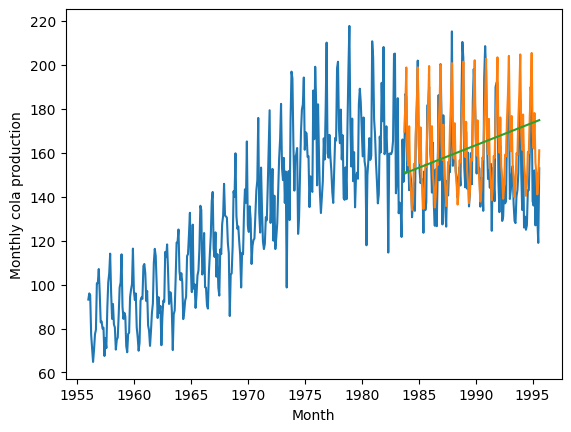

            Monthly cola production  sarimaxPred
Month                                           
1995-04-01                    127.0   155.686537
1995-05-01                    151.0   150.446281
1995-06-01                    130.0   141.082517
1995-07-01                    119.0   146.442692
1995-08-01                    153.0   161.175527
Empty DataFrame
Columns: []
Index: [1961-01-01 00:00:00, 1961-02-01 00:00:00, 1961-03-01 00:00:00, 1961-04-01 00:00:00, 1961-05-01 00:00:00]
1961-01-01     98.070690
1961-02-01     91.477467
1961-03-01     94.890708
1961-04-01     84.590863
1961-05-01     79.684504
1961-06-01     71.994714
1961-07-01     77.647538
1961-08-01     84.344707
1961-09-01     93.071801
1961-10-01    101.438911
1961-11-01    107.425900
1961-12-01    116.461078
1962-01-01    103.307977
1962-02-01     94.800474
1962-03-01     97.496241
1962-04-01     84.977684
1962-05-01     80.387324
1962-06-01     73.391871
1962-07-01     80.552982
1962-08-01     86.467175
1962-09-01     9

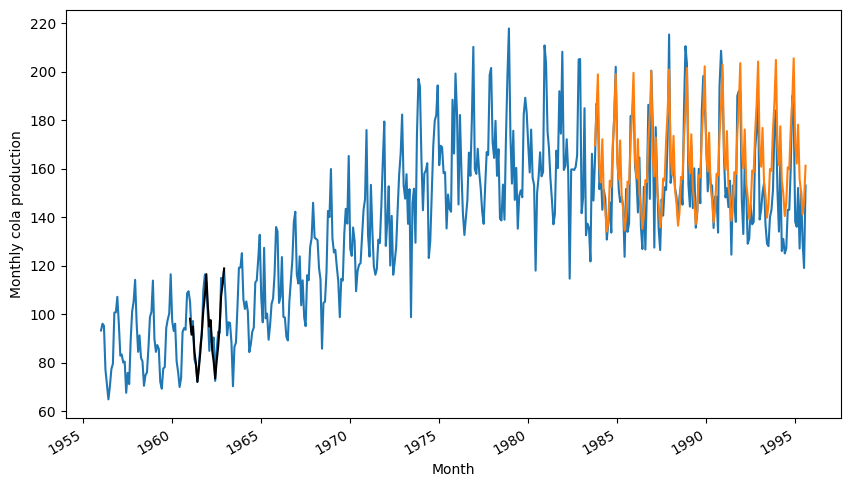

In [37]:
#@title{vertical-output:true}
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Now SARIMAX prediction
airP = df[['Monthly cola production']].copy(deep=True)
model = SARIMAX(train ['Monthly cola production'], order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
airP['sarimaxPred'] = prediction
print(airP.tail())

#Data looks better

# Plot

airp.dropna()
print(airp.head())
sns.lineplot(data=airP,x=airp.index,y='Monthly cola production')
sns.lineplot(data=airP, x=airp.index,y='sarimaxPred')
sns.lineplot(data=airp, x=airP.index,y='arimaPred')

plt.show()

# Compared to ARIMA, SARIMAX is much better
# Future prediction: first check the last date in our dataset
print(airP.tail())
#MS: Month Start frequency
#Creae a datea frame to hold index values from 01.01.61 to 01.12.62
# Corrected the date range to start from an earlier date and end at a later date
futureDate = pd.DataFrame(pd.date_range(start='1961-01-01', end='1962-12-01', freq='MS'), columns=['Dates'])
futureDate.set_index('Dates', inplace=True)
print(futureDate.head())

# Predict and print
print(model_fit.predict(start=futureDate.index[0], end=futureDate.index[-1]))
# Plot
airp.dropna()
plt.figure(figsize=(10,6))
sns.lineplot(data=airP, x=airp.index, y='Monthly cola production')
sns.lineplot(data=airP, x=airP.index, y='sarimaxPred')
model_fit.predict(start=futureDate.index[0], end=futureDate.index[-1]).plot(color='black')
plt.show()